In [1]:
#Importing the libraires
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [38]:
#Loading the data
df = pd.read_csv("FinalData.csv")
#checking first five rows
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Season
0,73,57,44,20.879744,82.002744,6.502985,202.935536,rice,Kharif
1,74,57,44,21.770462,80.319644,7.038096,226.655537,rice,Kharif
2,92,41,38,23.004459,82.320763,7.840207,263.964248,rice,Kharif
3,68,44,38,26.491096,80.158363,6.980401,242.864034,rice,Kharif
4,66,36,40,20.130175,81.604873,7.628473,262.717340,rice,Kharif


In [39]:
#dataframe columns 
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'Season'],
      dtype='object')

In [40]:
#Season column's elements value counts
df['Season'].value_counts()

Kharif         1300
Rabi            700
All Seasons     200
Name: Season, dtype: int64

In [41]:
#Label coding
df['Season'] = df['Season'].map({
    'Kharif':0,'Rabi':1,'All Seasons':2
})

In [42]:
"""
df['label'] = df['label'].map({
'banana':0,
'papaya':1,  
'pomegranate':2,    
'lentil':3,         
'chickpea':4,       
'blackgram':5,     
'mango':6,         
'mothbeans':7,      
'maize':8,         
'kidneybeans':9,   
'jute':10,         
'rice':11,         
'cotton':12,       
'mungbean':13,     
'watermelon':14,     
'apple':15,          
'coffee':16,         
'muskmelon':17,      
'orange':18,         
'grapes':19,         
'pigeonpeas':20,
'coconut':21
    
})
"""

"\ndf['label'] = df['label'].map({\n'banana':0,\n'papaya':1,  \n'pomegranate':2,    \n'lentil':3,         \n'chickpea':4,       \n'blackgram':5,     \n'mango':6,         \n'mothbeans':7,      \n'maize':8,         \n'kidneybeans':9,   \n'jute':10,         \n'rice':11,         \n'cotton':12,       \n'mungbean':13,     \n'watermelon':14,     \n'apple':15,          \n'coffee':16,         \n'muskmelon':17,      \n'orange':18,         \n'grapes':19,         \n'pigeonpeas':20,\n'coconut':21\n    \n})\n"

In [43]:
#one hot encoding
df = pd.get_dummies(df)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Season,label_apple,label_banana,...,label_mango,label_mothbeans,label_mungbean,label_muskmelon,label_orange,label_papaya,label_pigeonpeas,label_pomegranate,label_rice,label_watermelon
0,73,57,44,20.879744,82.002744,6.502985,202.935536,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,74,57,44,21.770462,80.319644,7.038096,226.655537,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,92,41,38,23.004459,82.320763,7.840207,263.964248,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,68,44,38,26.491096,80.158363,6.980401,242.864034,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,66,36,40,20.130175,81.604873,7.628473,262.717340,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
#Checking coloumns new
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Season',
       'label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
       'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
       'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
       'label_mango', 'label_mothbeans', 'label_mungbean', 'label_muskmelon',
       'label_orange', 'label_papaya', 'label_pigeonpeas', 'label_pomegranate',
       'label_rice', 'label_watermelon'],
      dtype='object')

In [45]:
#importing train test split
from sklearn.model_selection import train_test_split

#independent variable
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall','Season']]

#y = df['label']

In [46]:
#dependent variable
y = df[['label_apple', 'label_banana',
        'label_blackgram', 'label_chickpea', 'label_coconut', 'label_coffee',
        'label_cotton', 'label_grapes', 'label_jute', 'label_kidneybeans',
        'label_lentil', 'label_maize', 'label_mango', 'label_mothbeans',
        'label_mungbean', 'label_muskmelon', 'label_orange', 'label_papaya',
        'label_pigeonpeas', 'label_pomegranate', 'label_rice',
        'label_watermelon']]

In [47]:
#splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1760, 8), (1760, 22), (440, 8), (440, 22))

In [51]:
#building the model
def get_model_mlp():
    model = Sequential([
        Input(shape=[len(X_train.keys())]),
        Dense(128, activation= 'relu'),
        Dense(64,activation='relu'),
        Dense(32,activation='relu'),
        Dense(len(y_train.keys()),activation='softmax')        
    ])
    #compiling the model
    #opt = tf.keras.optimizers.Adam()
    #loss = tf.keras.losses.categorical_crossentropy()
    #metrics = tf.keras.metrics.Accuracy()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model

In [52]:
#model calling
model = get_model_mlp()
#model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 22)                726       
Total params: 12,214
Trainable params: 12,214
Non-trainable params: 0
_________________________________________________________________


In [53]:
#training our model
#os.mkdir("AI_Based_Crop_Recommendation_System")
epochs = 10
for i in range(epochs):
    history = model.fit(x=X_train,y=y_train, batch_size=None, epochs=10, verbose=1,#validation_split=0.15)
              validation_data=(X_test,y_test))
    model.save("AI_Based_Crop_Recommendation_System/My_model_"+str(i)+".h5")

Train on 1760 samples, validate on 440 samples
Epoch 1/10
1760/1760 [==============================] - 2s 946us/sample - loss: 3.5301 - acc: 0.3500 - val_loss: 1.1777 - val_acc: 0.6500
Epoch 2/10
1760/1760 [==============================] - 0s 139us/sample - loss: 0.8396 - acc: 0.7761 - val_loss: 0.5867 - val_acc: 0.8114
Epoch 3/10
1760/1760 [==============================] - 0s 265us/sample - loss: 0.4352 - acc: 0.8864 - val_loss: 0.3298 - val_acc: 0.9205
Epoch 4/10
1760/1760 [==============================] - 0s 179us/sample - loss: 0.2939 - acc: 0.9216 - val_loss: 0.2509 - val_acc: 0.9318
Epoch 5/10
1760/1760 [==============================] - 0s 143us/sample - loss: 0.2244 - acc: 0.9352 - val_loss: 0.3380 - val_acc: 0.8932
Epoch 6/10
1760/1760 [==============================] - 0s 204us/sample - loss: 0.2287 - acc: 0.9250 - val_loss: 0.2113 - val_acc: 0.9455
Epoch 7/10
1760/1760 [==============================] - 0s 160us/sample - loss: 0.2065 - acc: 0.9330 - val_loss: 0.1852 - val

1760/1760 [==============================] - 0s 130us/sample - loss: 0.0573 - acc: 0.9750 - val_loss: 0.1098 - val_acc: 0.9614
Epoch 9/10
1760/1760 [==============================] - 0s 138us/sample - loss: 0.0582 - acc: 0.9756 - val_loss: 0.1209 - val_acc: 0.9500
Epoch 10/10
1760/1760 [==============================] - 0s 139us/sample - loss: 0.0603 - acc: 0.9773 - val_loss: 0.0699 - val_acc: 0.9682
Train on 1760 samples, validate on 440 samples
Epoch 1/10
1760/1760 [==============================] - 0s 145us/sample - loss: 0.0651 - acc: 0.9727 - val_loss: 0.1170 - val_acc: 0.9591
Epoch 2/10
1760/1760 [==============================] - 0s 129us/sample - loss: 0.0726 - acc: 0.9676 - val_loss: 0.1231 - val_acc: 0.9568
Epoch 3/10
1760/1760 [==============================] - 0s 140us/sample - loss: 0.0853 - acc: 0.9636 - val_loss: 0.1129 - val_acc: 0.9545
Epoch 4/10
1760/1760 [==============================] - 0s 132us/sample - loss: 0.0752 - acc: 0.9676 - val_loss: 0.0820 - val_acc: 0.96

Text(0.5, 1.0, 'Loss')

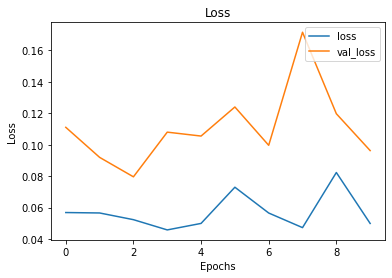

In [54]:
# Plotting Epochs vs. Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'], loc='upper right')
plt.title("Loss")

Text(0.5, 1.0, 'Accuracy')

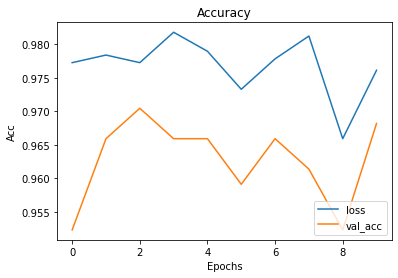

In [55]:
# Plotting Epochs vs. Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['loss','val_acc'], loc='lower right')
plt.title("Accuracy")

In [56]:
model = load_model("AI_Based_Crop_Recommendation_System/My_model_9.h5")

In [57]:
#Evaluating the model X_test and y_test
model.evaluate(X_test,y_test)

440/440 [==============================] - 0s 600us/sample - loss: 0.0962 - acc: 0.9682


[0.09624365818771449, 0.9681818]

In [58]:
#making predictions
model.predict(X_test)[0]

array([6.5219705e-11, 2.8690118e-11, 3.6892090e-21, 4.3545506e-14,
       1.5312310e-19, 5.6144325e-12, 1.5445605e-07, 4.1965631e-08,
       7.0832686e-16, 3.7472026e-15, 2.9311006e-14, 2.2301630e-05,
       1.9174042e-17, 1.4175212e-05, 1.5674600e-07, 9.9993038e-01,
       6.2975376e-09, 3.7053172e-09, 8.5522350e-13, 9.0681851e-11,
       1.6196873e-13, 3.2836375e-05], dtype=float32)

In [59]:
#Enter the parameters to get Recommendation
print("Enter amount of nitrogen:")
N = input()
print("Enter the amount of potassium:")
K = input()
print("Enter the amount of Phosporos:")
P = input()
print("Enter the pH value:")
ph = input()
print("Enter the amount of rainfall:")
rainfall = input()
print("Enter the temperature:")
temperature = input()
print("Enter the humidity:")
humidity = input()

Enter amount of nitrogen:
23
Enter the amount of potassium:
43
Enter the amount of Phosporos:
54
Enter the pH value:
7.8
Enter the amount of rainfall:
400
Enter the temperature:
23
Enter the humidity:
30


In [60]:
print("Enter Season:")
season = input()
#Note:- Kharif = 0, Rabi = 1, All season = 2

Enter Season:
1


In [61]:
test_data = [N,P,K,temperature,humidity,ph,rainfall,season]
test_data = np.array(test_data).reshape(1,-1)
test_data.shape
model = load_model("AI_Based_Crop_Recommendation_System/My_model_9.h5")
test_data = np.array(test_data).astype(float)
test_data

array([[ 23. ,  54. ,  43. ,  23. ,  30. ,   7.8, 400. ,   1. ]])

In [62]:
own_pred = model.predict(test_data)
#own_pred = round(own_pred[0],2)
#print(own_pred)
#own_pred[0]

In [63]:
crop_labels = ['banana','papaya','pomegranate','lentil','chickpea','blackgram','mango','mothbeans','maize','kidneybeans',   
        'jute','rice','cotton','mungbean','watermelon','apple','coffee','muskmelon','orange','grapes','pigeonpeas','coconut']
recommended = {}
for i in range(22):
    key = crop_labels[i]
    value = own_pred[0][i]
    recommended[key] = value
recommended_crop = max(recommended, key=recommended.get)
print("Recommended crop:",recommended_crop)

Recommended crop: pigeonpeas


In [25]:
#now predicting other 
import pandas as pd
import numpy as np

df = pd.read_csv("FinalData.csv")

df['Season'] = df['Season'].map({
    'Kharif':0,'Rabi':1,'All Seasons':2
})

X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall','Season']]

y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1760, 8), (1760,), (440, 8), (440,))

In [26]:
acc = []
model = []

In [27]:
# Using Descion Tree Algorithm
from sklearn.metrics import classification_report
from sklearn import metrics

In [28]:
# Using Descion Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  93.18181818181817
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.00      0.00      0.00        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.61      1.00      0.76        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.71      0.83        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00

C:\Users\Harsh\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# Using Naive Bayes
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [30]:
#Enter the parameters to recommend your crop
print("Enter amount of nitrogen:")
N = input()
print("Enter the amount of potassium:")
K = input()
print("Enter the amount of Phosporos:")
P = input()
print("Enter the pH value:")
ph = input()
print("Enter the amount of rainfall:")
rainfall = input()
print("Enter the temperature:")
temperature = input()
print("Enter the humidity:")
humidity = input()

Enter amount of nitrogen:
23
Enter the amount of potassium:
43
Enter the amount of Phosporos:
45
Enter the pH value:
6.7
Enter the amount of rainfall:
400
Enter the temperature:
43
Enter the huidity:
400


In [31]:
#Enter Season for the crop
print("Enter Season:")
season = input()
#Note:- Kharif = 0, Rabi = 1, All season = 2

Enter Season:
2


In [32]:
test_data = [N,P,K,temperature,humidity,ph,rainfall,season]
test_data = np.array(test_data).reshape(1,-1)
test_data = np.array(test_data).astype(float)

In [33]:
own_pred = DecisionTree.predict(test_data)
print("Recommended crop:",own_pred[0])

Recommended crop: banana


In [34]:
own_pred = NaiveBayes.predict(test_data)
print("Recommended Crop:",own_pred[0])

Recommended Crop: banana
